In [1]:
%pip install matplotlib
%pip install nltk
%pip install pandas
%pip install seaborn
%pip install sklearn.feature_extraction.text
%pip install sklearn.model_selection
%pip install sklearn.naive_bayes
%pip install sklearn.metrics
%pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement sklearn.feature_extraction.text (from versions: none)
ERROR: No matching distribution found for sklearn.feature_extraction.text

[notice] A new release of pip is available: 

In [2]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, precision_recall_fscore_support)

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/liviagaione/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/liviagaione/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
df = pd.read_csv('file:///Users/liviagaione/Downloads/BOLSONARO.csv', encoding='utf-8')

In [5]:
df2 = df[['tweet_text', 'label', 'query_used']]
print(df2)

                                              tweet_text  label  \
0                             Raiva do Bolsonaro agora )      1   
1      meu cobrador favorito do tubo tava falando hoj...      0   
2      mntrgln ia ser massa isso. Mas infelizmente é ...      0   
3              brina_gugli Bolsonaro cancelou presença (      0   
4      É Bolsonaro ( ? — Sou Isabella https//t.co/YOS...      0   
...                                                  ...    ...   
12428  Vai “tomar esporro da esposa ))) jairbolsonaro...      1   
12429  hoje 22 de outubro é o dia do paraquedista. pa...      1   
12430  Marilia61758583 leilarcosta jairbolsonaro Esta...      1   
12431  valoreconomico A diferença de público nas mani...      1   
12432  PPlacete Derrotas_D delucca jairbolsonaro ning...      1   

            query_used  
0          bolsonaro )  
1          bolsonaro (  
2          bolsonaro (  
3          bolsonaro (  
4          bolsonaro (  
...                ...  
12428  jairbolsonaro

In [6]:
df = df.replace(r'http\S+', '', regex=True)
df = df.replace(r'RT+',     '', regex=True)
df = df.replace(r'@\S+',    '', regex=True)
df = df.replace(r'RT+',     '', regex=True)
df = df.replace(r'p+ ',     '', regex=True)
df = df.replace(r'q+ ',     '', regex=True)
df = df.replace(r'd+ ',     '', regex=True)
df = df.replace(r'D+ ',     '', regex=True)
df = df.replace(r'P+ ',     '', regex=True)

In [7]:
%pip install wordcloud


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


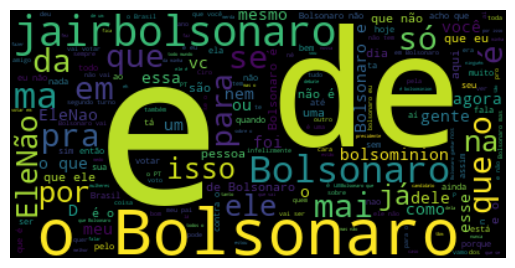

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

df2 = df['tweet_text']

#convert list to string and generate
unique_string=(" ").join(df2)

wordcloud = WordCloud().generate(unique_string)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show();

In [9]:
from pprint import pprint
import re

In [10]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].tweet_text)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == 0].tweet_text)[:5], width=200)

Positive headlines:

['Raiva do Bolsonaro agora )',
 'paulocruzphi Pronto agora você encontrou o seu motivo pra não votar no Bolsonaro e Mourão ele errou? Errou agora comece a defender um liberal e pare de fingir como um eleitor de direita )',
 'Como se não bastasse passar vergonha com Bolsonaro no facebook ainda são esmurrados nos comentários eu me divirto né )',
 'Não param de falar dele ) Bolsonaro ',
 'bujudin pelo menos não é Bolsonaro )']

Negative headlines:

['meu cobrador favorito do tubo tava falando hoje que vai votar no bolsonaro ( fiquei mt desapontada com ele',
 'mntrgln ia ser massa isso. Mas infelizmente é uma realidade muito distante pra gente ( eu sou Lulão pelos investimentos sociais. Não acredito 100% na inocência dele mas se não for ele é o embuste '
 'do bolsonaro',
 'brina_gugli Bolsonaro cancelou presença (',
 'É Bolsonaro ( ? — Sou Isabella ',
 'n tem o pai do panda? do kong fu panda? entao bolsonaro parece c ele ne!? vixi desculpa pai do panda (']


In [11]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].query_used)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == 0].query_used)[:5], width=200)

Positive headlines:

['bolsonaro )', 'bolsonaro )', 'bolsonaro )', 'bolsonaro )', 'bolsonaro )']

Negative headlines:

['bolsonaro (', 'bolsonaro (', 'bolsonaro (', 'bolsonaro (', 'bolsonaro (']


/var/folders/wq/ntd05bls1k53jhgfhpnwtnmc0000gn/T/ipykernel_7111/3141737626.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts, ax=ax, palette=['#FA8072', '#7FFFD4'])
/var/folders/wq/ntd05bls1k53jhgfhpnwtnmc0000gn/T/ipykernel_7111/3141737626.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Negativo', 'Positivo'])


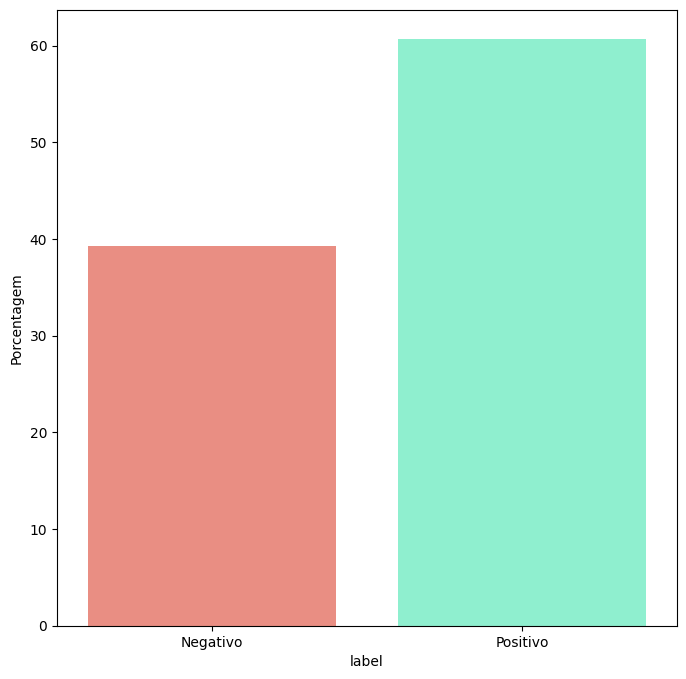

In [12]:
# Crie uma figura e eixos
fig, ax = plt.subplots(figsize=(8, 8))

# Calcule as contagens normalizadas
counts = df.label.value_counts(normalize=True) * 100

# Crie o gráfico de barras com cores diferentes
sns.barplot(x=counts.index, y=counts, ax=ax, palette=['#FA8072', '#7FFFD4'])

# Ajuste os rótulos do eixo x
ax.set_xticklabels(['Negativo', 'Positivo'])
ax.set_ylabel("Porcentagem")

# Exiba o gráfico
plt.show()


In [13]:
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer

example = "Isso é um exemplo de sentença!"

print(word_tokenize(example, language='portuguese'))


['Isso', 'é', 'um', 'exemplo', 'de', 'sentença', '!']


In [14]:
tokenizer = RegexpTokenizer(r'\w+')
print(tokenizer.tokenize(example))

['Isso', 'é', 'um', 'exemplo', 'de', 'sentença']


In [15]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('portuguese')

print(stop_words[:20])

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele']


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/liviagaione/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
def process_texto(tweet_text):
    tokens = []
    for line in tweet_text:
        line = line.lower()
        tok = tokenizer.tokenize(line)
        tok = [t for t in tok if t not in stop_words]
        tokens.extend(tok)

    return tokens

In [17]:
pos_lines = list(df[df.label == 1].tweet_text)

pos_tokens = process_texto(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(100)

[('bolsonaro', 4594),
 ('jairbolsonaro', 1619),
 ('pra', 1113),
 ('vai', 936),
 ('d', 587),
 ('votar', 535),
 ('vc', 507),
 ('bem', 458),
 ('elenão', 454),
 ('contra', 393),
 ('bom', 369),
 ('pt', 366),
 ('gente', 351),
 ('tá', 349),
 ('vou', 345),
 ('bolsominion', 345),
 ('agora', 344),
 ('dia', 342),
 ('brasil', 338),
 ('sobre', 333),
 ('ter', 312),
 ('aqui', 305),
 ('todos', 302),
 ('presidente', 299),
 ('sim', 299),
 ('voto', 298),
 ('pode', 296),
 ('turno', 283),
 ('cara', 277),
 ('elenao', 277),
 ('ver', 276),
 ('tudo', 272),
 ('ainda', 264),
 ('fazer', 253),
 ('aí', 249),
 ('nao', 237),
 ('pessoas', 237),
 ('nada', 235),
 ('melhor', 231),
 ('p', 230),
 ('vota', 230),
 ('então', 229),
 ('assim', 229),
 ('boa', 227),
 ('quer', 222),
 ('acho', 220),
 ('n', 217),
 ('hoje', 209),
 ('coisa', 203),
 ('pro', 198),
 ('todo', 194),
 ('falar', 192),
 ('vamos', 190),
 ('porque', 186),
 ('falando', 185),
 ('sabe', 181),
 ('favor', 178),
 ('menos', 177),
 ('segundo', 176),
 ('jair', 173),
 ('

In [18]:
neg_lines = list(df[df.label == 0].query_used)

neg_tokens = process_texto(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(100)

[('bolsonaro', 3193),
 ('elenão', 653),
 ('bolsominion', 554),
 ('jairbolsonaro', 356),
 ('forçabolsonaro', 18),
 ('bonaro', 17),
 ('bolsonarosim', 13),
 ('elesim', 10),
 ('bolsonaronojornalnacional', 9),
 ('nasruascombolsonaro', 9),
 ('bolsonaronao', 7),
 ('cassaçãodobolsonaro', 7),
 ('bolsonaro2018', 6),
 ('euvotobolsonaro', 6),
 ('nordeste17', 5),
 ('bolsonaronaban', 4),
 ('bolsonaronarecor', 4),
 ('17neles', 4),
 ('general', 3),
 ('mourao', 3),
 ('caixa2debolsonaro', 3),
 ('estoucombolsonaro', 2),
 ('todoscombolsonaro', 2),
 ('bolsonaroamordobrasil', 2),
 ('somosbolsonaro17', 1)]

In [19]:
neg_lines = list(df[df.label == 0].tweet_text)

neg_tokens = process_texto(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(100)

[('bolsonaro', 3190),
 ('pra', 710),
 ('vai', 648),
 ('bolsominion', 568),
 ('triste', 468),
 ('gente', 419),
 ('votar', 414),
 ('elenão', 387),
 ('jairbolsonaro', 386),
 ('queria', 301),
 ('ter', 296),
 ('tá', 290),
 ('elenao', 279),
 ('to', 274),
 ('medo', 256),
 ('ver', 252),
 ('pt', 248),
 ('aqui', 240),
 ('contra', 235),
 ('pessoas', 233),
 ('tão', 216),
 ('agora', 214),
 ('brasil', 212),
 ('tô', 212),
 ('ganhar', 212),
 ('cara', 212),
 ('n', 211),
 ('nao', 209),
 ('ainda', 203),
 ('infelizmente', 196),
 ('bem', 195),
 ('turno', 192),
 ('vou', 182),
 ('hoje', 180),
 ('sei', 172),
 ('pai', 171),
 ('acho', 168),
 ('ir', 167),
 ('dia', 155),
 ('pro', 152),
 ('ta', 151),
 ('segundo', 149),
 ('tudo', 145),
 ('vc', 141),
 ('tanto', 141),
 ('sim', 140),
 ('todo', 139),
 ('ai', 138),
 ('sobre', 136),
 ('deus', 132),
 ('tava', 129),
 ('coisa', 125),
 ('ciro', 125),
 ('vota', 124),
 ('mãe', 124),
 ('país', 123),
 ('falando', 122),
 ('assim', 122),
 ('fazer', 120),
 ('fico', 118),
 ('todos',

In [20]:
import math
import random
from collections import defaultdict
from pprint import pprint

import warnings
warnings.filterwarnings(action='ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sns.set_style(style='white')
sns.set_context(context='notebook', font_scale=1.3, rc={'figure.figsize': (16,9)})

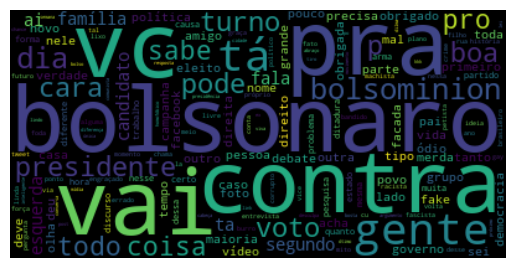

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

unique_string=(" ").join(pos_freq)

wordcloud = WordCloud().generate(unique_string)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show();

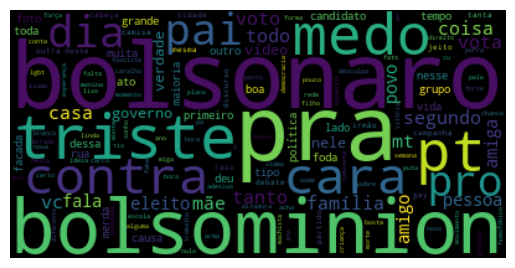

In [22]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

unique_string=(" ").join(neg_freq)

wordcloud = WordCloud().generate(unique_string)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show();

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

t1 = "Eu gosto muito do Ciro Gomes e seu pocisionamento"
t2 = "Eu gosto muito quando Ciro Gomes fala sobre politíca"

vect = CountVectorizer(binary=True)
X = vect.fit_transform([t1, t2])

X.toarray()

array([[1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0],
       [1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1]])

In [24]:
list(zip(X.toarray()[0], vect.get_feature_names_out()))

[(1, 'ciro'),
 (1, 'do'),
 (1, 'eu'),
 (0, 'fala'),
 (1, 'gomes'),
 (1, 'gosto'),
 (1, 'muito'),
 (1, 'pocisionamento'),
 (0, 'politíca'),
 (0, 'quando'),
 (1, 'seu'),
 (0, 'sobre')]

In [25]:
list(zip(X.toarray()[1], vect.get_feature_names_out()))


[(1, 'ciro'),
 (0, 'do'),
 (1, 'eu'),
 (1, 'fala'),
 (1, 'gomes'),
 (1, 'gosto'),
 (1, 'muito'),
 (0, 'pocisionamento'),
 (1, 'politíca'),
 (1, 'quando'),
 (0, 'seu'),
 (1, 'sobre')]

In [26]:
vect = CountVectorizer(max_features=1000, binary=True)
X = vect.fit_transform(df.tweet_text)

X.toarray()

list(zip(X.toarray()[3], vect.get_feature_names_out()))


[(0, '10'),
 (0, '100'),
 (0, '12'),
 (0, '13'),
 (0, '17'),
 (0, '17neles'),
 (0, '20'),
 (0, '2018'),
 (0, '28'),
 (0, '2º'),
 (0, '30'),
 (0, 'aborto'),
 (0, 'abraço'),
 (0, 'acabar'),
 (0, 'acabei'),
 (0, 'acabou'),
 (0, 'acha'),
 (0, 'acham'),
 (0, 'achando'),
 (0, 'achar'),
 (0, 'achei'),
 (0, 'acho'),
 (0, 'acima'),
 (0, 'acontecer'),
 (0, 'aconteceu'),
 (0, 'acostumando'),
 (0, 'acredita'),
 (0, 'acreditar'),
 (0, 'acredito'),
 (0, 'adesivo'),
 (0, 'adianta'),
 (0, 'ae'),
 (0, 'afinal'),
 (0, 'agora'),
 (0, 'agr'),
 (0, 'ah'),
 (0, 'ai'),
 (0, 'ainda'),
 (0, 'ajuda'),
 (0, 'ajudar'),
 (0, 'algo'),
 (0, 'algum'),
 (0, 'alguma'),
 (0, 'algumas'),
 (0, 'alguns'),
 (0, 'alguém'),
 (0, 'ali'),
 (0, 'aliás'),
 (0, 'além'),
 (0, 'amanhã'),
 (0, 'ameaça'),
 (0, 'amiga'),
 (0, 'amigo'),
 (0, 'amigos'),
 (0, 'amizade'),
 (0, 'amo'),
 (0, 'amoedo'),
 (0, 'amor'),
 (0, 'anitta'),
 (0, 'anjo'),
 (0, 'ano'),
 (0, 'anos'),
 (0, 'antes'),
 (0, 'anti'),
 (0, 'ao'),
 (0, 'aos'),
 (0, 'apenas'),


In [27]:
from sklearn.model_selection import train_test_split

X = df.tweet_text
y = df.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

(9946,)
(2487,)


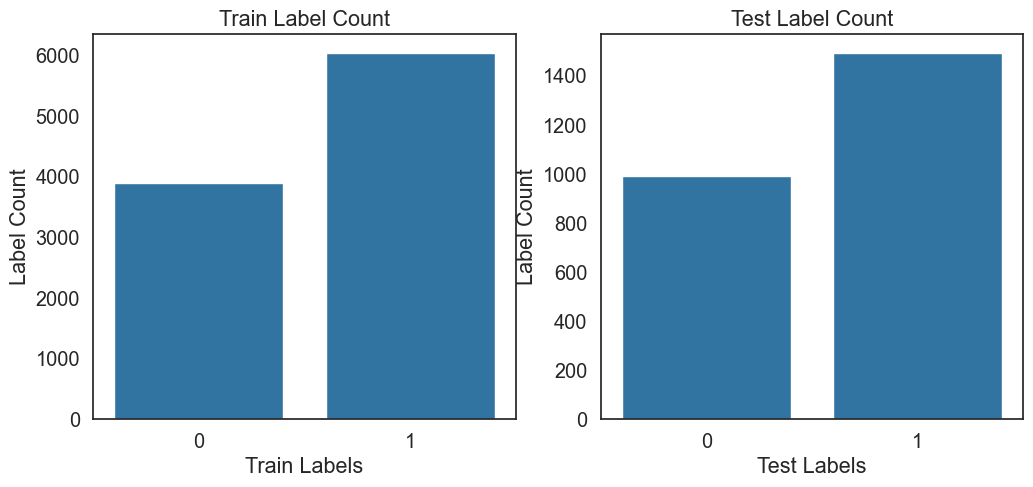

In [28]:
print(X_train.shape) #output (7666, 12222)
print(X_test.shape) #output (1917, 12222)

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,2, figsize=(12,5))
for idx, group in enumerate([('Train', y_train), ('Test', y_test)]):
    data = group[1].value_counts()
    sns.barplot(ax=ax[idx], x=data.index, y=data.values)
    ax[idx].set_title(f'{group[0]} Label Count')
    ax[idx].set_xlabel(f'{group[0]} Labels')
    ax[idx].set_ylabel('Label Count')

plt.show()

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(max_features=1000, binary=True)

X_train_vect = vect.fit_transform(X_train)

In [30]:
counts = df.label.value_counts()
print(counts)

print("\nPredicting only -1 = {:.2f}% accuracy".format(counts[1] / sum(counts) * 100))

label
1    7545
0    4888
Name: count, dtype: int64

Predicting only -1 = 60.69% accuracy


In [31]:
pip install imblearn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [32]:
from imblearn.over_sampling import SMOTE

Git repo para pegar visualização de dados de treino e teste: https://github.com/Aryal-Shanta/Splitting_data_in_Machine_Learning


In [33]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()

X_train_res, y_train_res = sm.fit_resample(X_train_vect, y_train)


In [34]:
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))

[(0, 6050), (1, 6050)]


Naive Bayes

In [35]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

nb.fit(X_train_res, y_train_res)

nb.score(X_train_res, y_train_res)


0.7899173553719008

In [36]:
X_test_vect = vect.transform(X_test)

y_pred = nb.predict(X_test_vect)

y_pred

array([0, 0, 1, ..., 0, 1, 1])

In [37]:
# #Ajuste do Modelo KNN
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier()
# knn.fit(X_train_res, y_train_res)
# resultado_knn = knn.predict(X_train_res)


In [38]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score

print("Precision: {:.2f}%".format(precision_score(y_test, y_pred) * 100))
print("Recall: {:.2f}%".format(recall_score(y_test, y_pred) * 100))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred) * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Precision: 80.62%
Recall: 75.38%
Accuracy: 74.31%

F1 Score: 77.91

COnfusion Matrix:
 [[ 721  271]
 [ 368 1127]]


In [39]:
from sklearn.model_selection import ShuffleSplit

X = df.tweet_text
y = df.label

ss = ShuffleSplit(n_splits=10, test_size=0.2)
sm = SMOTE()

accs = []
f1s = []
cms = []

for train_index, test_index in ss.split(X):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_train_vect = vect.fit_transform(X_train)
    X_test_vect = vect.transform(X_test)

    X_train_res, y_train_res = sm.fit_resample(X_train_vect, y_train)

    nb.fit(X_train_res, y_train_res)
    y_pred = nb.predict(X_test_vect)
    accs.append(accuracy_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred))
    cms.append(confusion_matrix(y_test, y_pred))

print("\nAverage accuracy across folds: {:.2f}%".format(sum(accs) / len(accs) * 100))
print("\nAverage F1 score across folds: {:.2f}%".format(sum(f1s) / len(f1s) * 100))
print("\nAverage Confusion Matrix across folds: \n {}".format(sum(cms) / len(cms)))



Average accuracy across folds: 74.08%

Average F1 score across folds: 77.80%

Average Confusion Matrix across folds: 
 [[ 712.2  266.6]
 [ 378.  1130.2]]


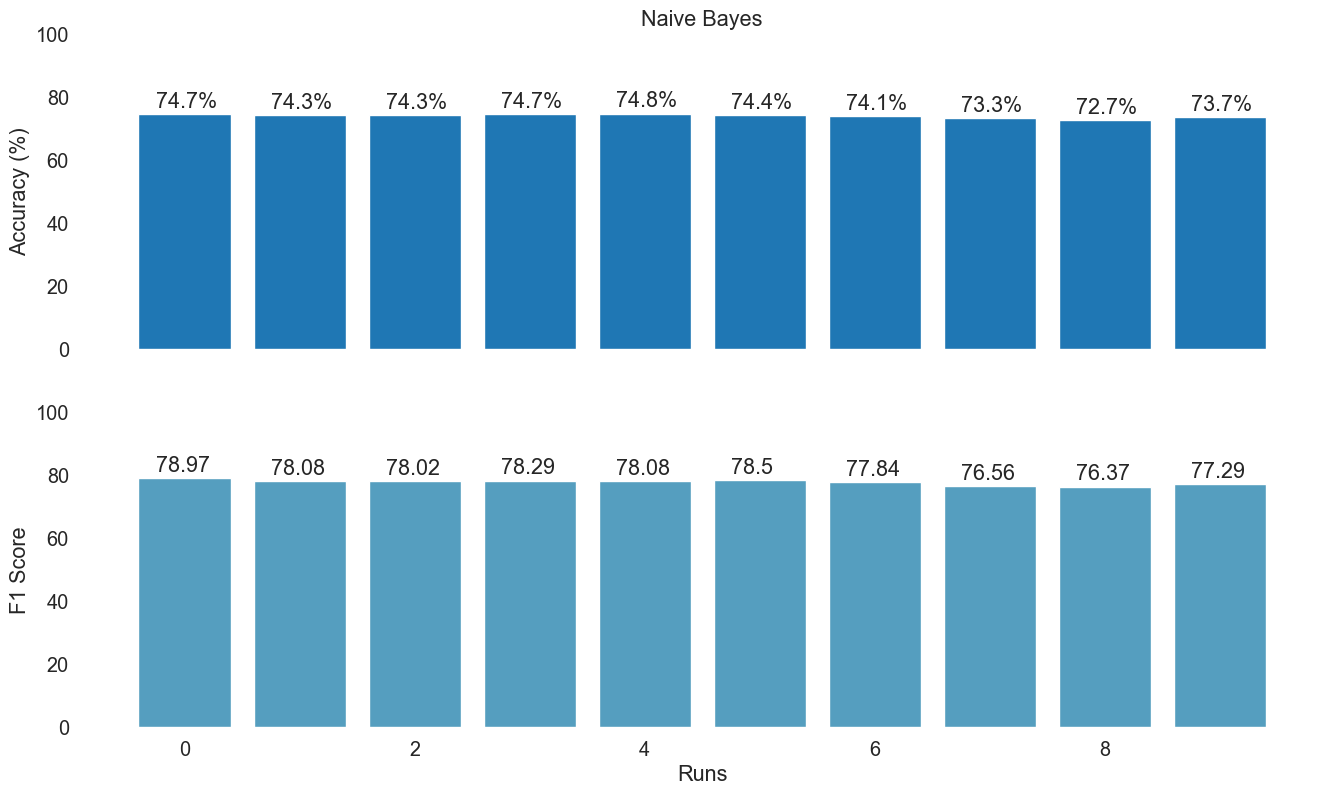

In [40]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,9))

acc_scores = [round(a * 100, 1) for a in accs]
f1_scores = [round(f * 100, 2) for f in f1s]

x1 = np.arange(len(acc_scores))
x2 = np.arange(len(f1_scores))

ax1.bar(x1, acc_scores)
ax2.bar(x2, f1_scores, color='#559ebf')

for i, v in enumerate(list(zip(acc_scores, f1_scores))):
    ax1.text(i - 0.25, v[0] + 2, str(v[0]) + '%')
    ax2.text(i - 0.25, v[1] + 2, str(v[1]))

ax1.set_ylabel('Accuracy (%)')
ax1.set_title('Naive Bayes')
ax1.set_ylim([0, 100])

ax2.set_ylabel('F1 Score')
ax2.set_xlabel('Runs')
ax2.set_ylim([0, 100])

sns.despine(bottom=True, left=True)
plt.show()

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

X = df.tweet_text
y = df.label

cv = ShuffleSplit(n_splits=20, test_size=0.2)

models = [
    MultinomialNB(),
    LogisticRegression(penalty="l1", C=1, solver="liblinear", max_iter=200, class_weight="balanced", tol= 0.1),
    RandomForestClassifier(criterion="entropy", min_samples_leaf= 1, min_samples_split= 2, n_estimators=1000),
]

sm = SMOTE()

results = {
    model.__class__.__name__: {
        'accuracy': [],
        'f1_score': [],
        'confusion_matrix': []
    } for model in models
}

for train_index, test_index in cv.split(X):
    X_train, X_test  = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_train_vect = vect.fit_transform(X_train)
    X_test_vect = vect.transform(X_test)

    X_train_res, y_train_res = sm.fit_resample(X_train_vect, y_train)

    for model in models:
        model.fit(X_train_res, y_train_res)
        y_pred = model.predict(X_test_vect)

        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        results[model.__class__.__name__]['accuracy'].append(acc)
        results[model.__class__.__name__]['f1_score'].append(f1)
        results[model.__class__.__name__]['confusion_matrix'].append(cm)

In [42]:
for model, d in results.items():
    avg_acc = sum(d['accuracy']) / len(d['accuracy']) * 100
    avg_f1 = sum(d['f1_score']) / len(d['f1_score']) * 100
    avg_cm = sum(d['confusion_matrix']) / len(d['confusion_matrix'])

    slashes = '-' * 30

    s = f"""{model}\n{slashes}
        Avg. Accuracy: {avg_acc:.2f}%
        Avg. F1 Score: {avg_f1:.2f}
        Avg. Confusion Matrix:
        \n{avg_cm}
        """
    print(s)


MultinomialNB
------------------------------
        Avg. Accuracy: 74.26%
        Avg. F1 Score: 78.13
        Avg. Confusion Matrix:
        
[[ 703.35  268.45]
 [ 371.65 1143.55]]
        
LogisticRegression
------------------------------
        Avg. Accuracy: 72.93%
        Avg. F1 Score: 76.91
        Avg. Confusion Matrix:
        
[[ 692.8   279.  ]
 [ 394.15 1121.05]]
        
RandomForestClassifier
------------------------------
        Avg. Accuracy: 72.33%
        Avg. F1 Score: 78.00
        Avg. Confusion Matrix:
        
[[ 579.4   392.4 ]
 [ 295.65 1219.55]]
        


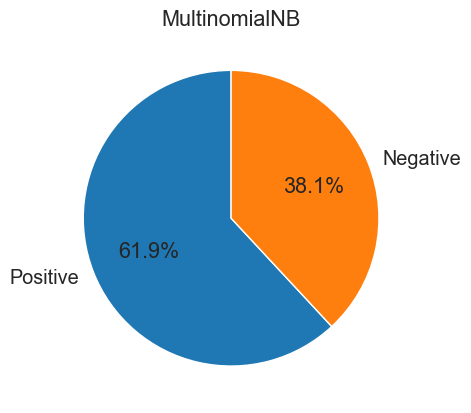

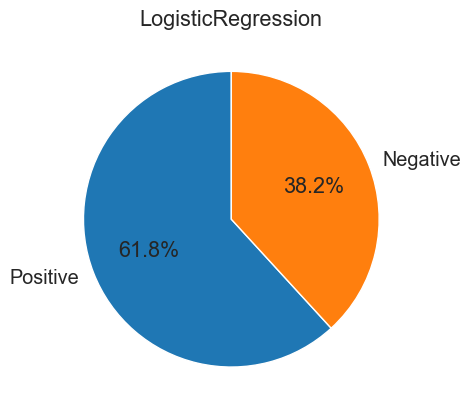

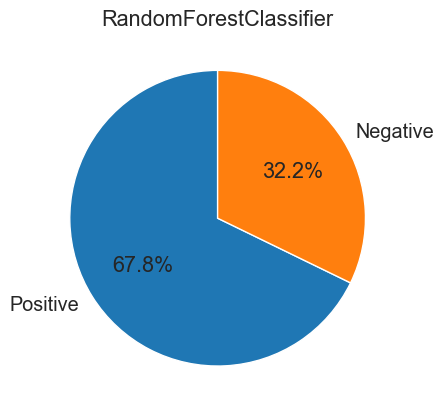

In [43]:
import matplotlib.pyplot as plt

# Calculando as contagens de classificação positiva e negativa para cada classificador
for model, metrics in results.items():
    positive_count = 0
    negative_count = 0
    for cm in metrics['confusion_matrix']:
        positive_count += cm[1][1]  # True Positives
        negative_count += cm[0][0]  # True Negatives

    # Gerando o gráfico de pizza para o classificador atual
    fig, ax = plt.subplots()
    ax.pie([positive_count, negative_count], labels=['Positive', 'Negative'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'{model}')
    plt.show()

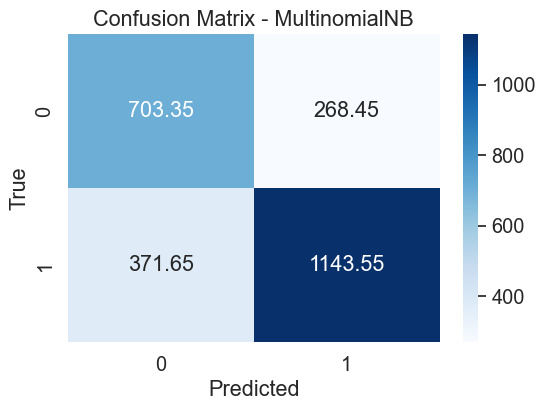

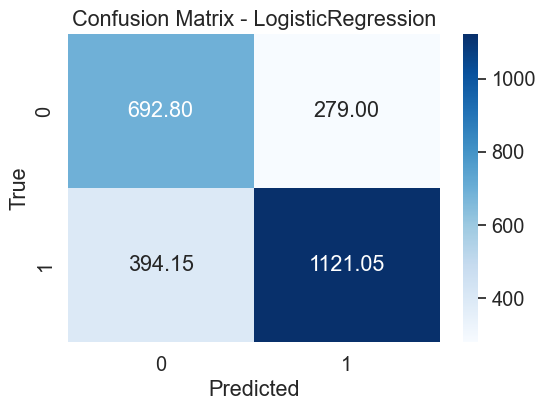

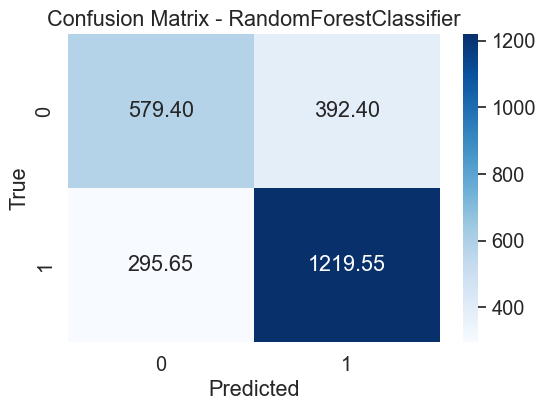

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Iterar sobre os resultados e plotar as matrizes de confusão
for model_name, result in results.items():
    avg_conf_matrix = sum(result['confusion_matrix']) / len(result['confusion_matrix'])
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(avg_conf_matrix, annot=True, fmt="0.2f", cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Create a list of model names
model_names = [model.__class__.__name__ for model in models]

# Create a dictionary to store the accuracy values for each model
results = {
    model_name: {'accuracy': []} for model_name in model_names
}

# Train and evaluate each model using cross-validation
for train_index, test_index in cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_train_vect = vect.fit_transform(X_train)
    X_test_vect = vect.transform(X_test)

    X_train_res, y_train_res = sm.fit_resample(X_train_vect, y_train)

    for model in models:
        model.fit(X_train_res, y_train_res)
        y_pred = model.predict(X_test_vect)

        acc = accuracy_score(y_test, y_pred)

        results[model.__class__.__name__]['accuracy'].append(acc)

# Adjust the size of the figure dynamically based on the number of models
fig_height = 4 * len(models)  # Adjust height based on the number of models
fig, axs = plt.subplots(len(models), 1, figsize=(16, fig_height), constrained_layout=True)

if len(models) == 1:
    axs = [axs]  # Ensure axs is iterable when there is only one subplot

for i, model_name in enumerate(model_names):
    axs[i].plot(results[model_name]['accuracy'], label=model_name, marker='o')
    axs[i].set_title(model_name)
    axs[i].set_ylabel('Accuracy')
    axs[i].set_xlabel('Epoch')
    axs[i].legend()

# Display the plots
plt.show()

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score

# Create a list of model names
model_names = [model.__class__.__name__ for model in models]

# Create a dictionary to store the precision and recall values for each model
results = {
    model_name: {'precision': [], 'recall': []} for model_name in model_names
}

# Train and evaluate each model using cross-validation
for train_index, test_index in cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_train_vect = vect.fit_transform(X_train)
    X_test_vect = vect.transform(X_test)

    X_train_res, y_train_res = sm.fit_resample(X_train_vect, y_train)

    for model in models:
        model.fit(X_train_res, y_train_res)
        y_pred = model.predict(X_test_vect)

        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)

        results[model.__class__.__name__]['precision'].append(precision)
        results[model.__class__.__name__]['recall'].append(recall)

# Adjust the size of the figure
fig_height = 3 * len(models)  # Adjust height based on the number of models
fig, axs = plt.subplots(len(models), 1, figsize=(16, fig_height), constrained_layout=True)

if len(models) == 1:
    axs = [axs]  # Ensure axs is iterable when there is only one subplot

for i, model_name in enumerate(model_names):
    axs[i].plot(results[model_name]['precision'], label='Precision', marker='o')
    axs[i].plot(results[model_name]['recall'], label='Recall', marker='x')
    axs[i].set_title(model_name)
    axs[i].set_ylabel('Score')
    axs[i].set_xlabel('Epoch')
    axs[i].legend()

# Display the plots
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

# Create a list of model names
model_names = [model.__class__.__name__ for model in models]

# Create a dictionary to store the accuracy and loss values for each model
results = {
    model.__class__.__name__: {
        'accuracy': [],
        'f1_score': [],
        'confusion_matrix': []
    } for model in models
}

# Train and evaluate each model using cross-validation
for train_index, test_index in cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_train_vect = vect.fit_transform(X_train)
    X_test_vect = vect.transform(X_test)

    X_train_res, y_train_res = sm.fit_resample(X_train_vect, y_train)

    for model in models:
        model.fit(X_train_res, y_train_res)
        y_pred = model.predict(X_test_vect)

        f1score = f1_score(y_test, y_pred)

        results[model.__class__.__name__]['f1_score'].append(f1score)

# Adjust the size of the figure
fig_height = 3 * len(models)  # Adjust height based on the number of models
fig, axs = plt.subplots(len(models), 1, figsize=(16, fig_height), constrained_layout=True)

if len(models) == 1:
    axs = [axs]  # Ensure axs is iterable when there is only one subplot

for i, model_name in enumerate(model_names):
    axs[i].plot(results[model_name]['f1_score'], label='F1-Score', marker='o')
    axs[i].set_title(model_name)
    axs[i].set_ylabel('Score')
    axs[i].set_xlabel('Epoch')
    axs[i].legend()

# Display the plots
plt.show()